In [25]:
%cd /content/drive/MyDrive/Home_Depot_Case_Study/Workspace3
!pwd

/content/drive/MyDrive/Home_Depot_Case_Study/Workspace3
/content/drive/MyDrive/Home_Depot_Case_Study/Workspace3


# Imports and Utility Functions

In [26]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib_venn import venn2
import regex as re
from collections import Counter
!pip install nltk 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from collections import Counter
from nltk.stem import PorterStemmer 
from wordcloud import WordCloud, STOPWORDS 
from prettytable import PrettyTable
from sklearn.feature_extraction.text import CountVectorizer 
from textblob import TextBlob
from scipy.stats import spearmanr
import warnings
warnings.filterwarnings('ignore')
import math
import re
import xgboost as xgb
from xgboost import XGBRegressor
from nltk import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from numpy.linalg import norm
import pickle
from tqdm.notebook import tqdm
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from scipy.stats import uniform, randint, loguniform

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [27]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten, BatchNormalization
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

In [28]:
#Utility Functions
def display_results(results, thresh=0.1):
  ranks = results.cv_results_['rank_test_score']
  ind = np.argsort(ranks)
  sorted_train_scores = np.array(-results.cv_results_['mean_train_score'])[ind]
  sorted_test_scores = np.array(-results.cv_results_['mean_test_score'])[ind]
  sorted_params = np.array(results.cv_results_['params'])[ind]
  
  for i in range(len(ranks)):
    if (sorted_test_scores[i] - sorted_train_scores[i]) < thresh:
      print('train ->', sorted_train_scores[i])
      print('test ->', sorted_test_scores[i])
      print('params ->', sorted_params[i])
      print('*'*100)
    else: 
      continue

def plot_scores_single(results, param, log=False):
  '''
  Here you can use distribution also for the single parameter
  '''
  X = [x[param] for x in results.cv_results_['params']]
  if log:
    X = [math.log10(a) for a in X]
  plt.plot(X, -results.cv_results_['mean_train_score'])
  plt.plot(X, -results.cv_results_['mean_test_score'])
  plt.title('rmse')
  plt.ylabel('rmse')
  plt.xlabel(param)
  plt.legend(['train', 'tets'], loc='lower left')
  plt.show()

# Preparing the Data

In [29]:
Train_X2_F1 = pd.read_pickle('meta_model/Train_X2_F1.pkl')
Train_X2_F2 = pd.read_pickle('meta_model/Train_X2_F2.pkl')
Train_X2_F3 = pd.read_pickle('meta_model/Train_X2_F3.pkl')
Train_Y2 = pd.read_pickle('meta_model/Train_Y2.pkl')

train_x = pd.concat([Train_X2_F1, Train_X2_F2, Train_X2_F3], axis=1)
train_y = Train_Y2
print(train_x.shape, train_y.shape)

(29627, 17) (29627,)


In [30]:
Test_X_F1 = pd.read_pickle('meta_model/Test_X_F1.pkl')
Test_X_F2 = pd.read_pickle('meta_model/Test_X_F2.pkl')
Test_X_F3 = pd.read_pickle('meta_model/Test_X_F3.pkl')
Test_Y = pd.read_pickle('meta_model/Test_Y.pkl')

test_x = pd.concat([Test_X_F1, Test_X_F2, Test_X_F3], axis=1)
test_y = Test_Y
print(test_x.shape, test_y.shape)

(14814, 17) (14814,)


# Modelling

In [ ]:
scaler_final = StandardScaler()
train_x_std = scaler_final.fit_transform(train_x)

best rmse: test 0.45347587166077563 train 0.4531396169624607
best param {'alpha': 116.56915613247409}


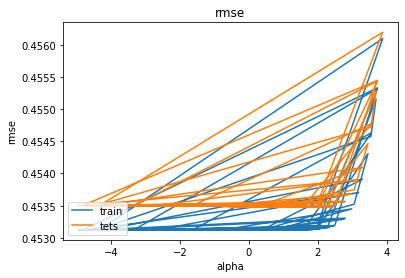

In [ ]:
random_grid = {
               'alpha': loguniform(1e-5, 1e4)
               }

model = Ridge()
random_search = RandomizedSearchCV(estimator = model, 
                               param_distributions = random_grid, n_iter = 100, 
                               scoring='neg_root_mean_squared_error', 
                               cv = 5, verbose=False, return_train_score=True, 
                               random_state=42, n_jobs = -1)
results = random_search.fit(train_x_std, train_y)
# summarize
print('best rmse:', 'cv', -results.best_score_, 'train', -results.cv_results_['mean_train_score'][results.best_index_])
print('best param', results.best_params_)

plot_scores_single(results, 'alpha', log=True)

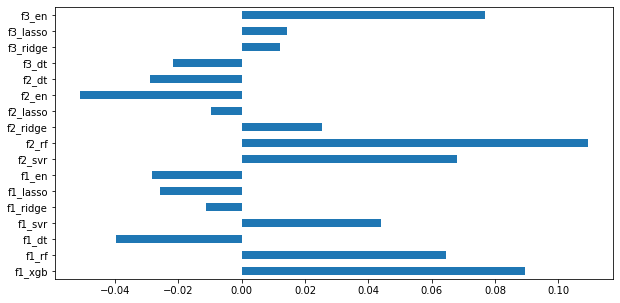

In [ ]:
best_params = {'alpha': 116.5}
ridge_model = Ridge(**best_params)
ridge_model.fit(train_x_std, train_y)

importance = ridge_model.coef_
plt.figure(figsize=(10, 5))
pd.Series(importance, index=train_x.columns).plot(kind='barh')
plt.show()

In [ ]:
pickle.dump(scaler_final, open('Final/modelling/meta_scaler.pkl', "wb"))
pickle.dump(ridge_model, open('Final/modelling/meta_ridge.pkl', "wb"))

# Final Testing

In [ ]:
test_x_std = scaler_final.transform(test_x)
test_y_pred = ridge_model.predict(test_x_std)
rmse = mean_squared_error(test_y, test_y_pred, squared=False)
print('Final Error on test Data is:', rmse)

Final Error on test Data is: 0.4539293804269998
